#**Projet Stat-Math**
# **Ludane lagnol SOBJIO**
# ENSAI MS Data Science Pour la Connaissance Client

![](https://thumbs.dreamstime.com/b/graphique-de-gestion-17998087.jpg)

### Introduction du projet

La statistique repose sur des bases mathématiques solides, parmi lesquelles la **Loi Forte des Grands Nombres** (LFGN) et le **Théorème Central Limite** (TCL) occupent une place centrale. Ces théorèmes fournissent des garanties sur la précision des estimations à partir d’échantillons, permettant ainsi de mieux comprendre et modéliser les phénomènes observés dans la réalité.

Dans ce projet, nous mettons en pratique ces principes à l’aide du célèbre jeu de données **Wine Quality**. Ce jeu de données contient des informations sur les propriétés physico-chimiques de différents types de vin (rouge et blanc) ainsi que leurs notes de qualité. Cette richesse permet d'explorer des données complexes tout en validant des résultats théoriques.

#### Contexte théorique

La **Loi Forte des Grands Nombres** établit que, lorsque la taille de l’échantillon tend vers l’infini, la moyenne empirique converge presque sûrement vers la moyenne vraie de la population. Ce principe justifie pourquoi des échantillons de grande taille permettent des estimations fiables.

Le **Théorème Central Limite**, quant à lui, garantit que, même si les données initiales ne suivent pas une loi normale, la distribution des moyennes empiriques d’échantillons indépendants converge vers une loi normale pour des tailles d’échantillon suffisantes. Ce théorème est particulièrement utile pour construire des intervalles de confiance ou pour effectuer des tests statistiques.

Enfin, ce projet ne se limite pas à ces deux théorèmes fondamentaux : il aborde également la **convergence des estimateurs**, les notions de **biais et variance**, ainsi que l’utilisation des **intervalles de confiance** pour quantifier l’incertitude des estimations. Ces analyses permettent de poser un regard critique sur les propriétés des méthodes statistiques appliquées aux données réelles.

#### Objectifs :

1. **Loi Forte des Grands Nombres (LFGN)** :
   - Étudier la convergence de la moyenne empirique vers la moyenne vraie en simulant des échantillons de tailles croissantes.

2. **Théorème Central Limite (TCL)** :
   - Analyser la distribution des moyennes empiriques d’échantillons de taille fixe et vérifier son rapprochement avec une loi normale théorique.

3. **Convergence des Estimateurs** :
   - Explorer la robustesse et la précision des estimateurs de la moyenne et de la variance en fonction de la taille des échantillons.

4. **Biais et Variance** :
   - Étudier la décomposition biais-variance pour évaluer l’équilibre entre précision et complexité dans les estimations.

5. **Écart-type des Moyennes Empiriques** :
   - Vérifier la relation théorique entre l’écart-type des moyennes empiriques et la taille des échantillons $\sigma / \sqrt{n}$.

6. **Intervalle de Confiance** :
   - Construire et interpréter des intervalles de confiance pour analyser la fiabilité des estimations.

#### Méthodologie :

- **Données utilisées** : Nous exploitons le jeu de données Wine Quality, qui contient des mesures chimiques (comme l'acidité, le pH, et la teneur en alcool) et des notes de qualité associées. Ces données permettent une exploration variée des principes statistiques.

- **Analyse statistique** : Nous concentrons notre étude sur une ou plusieurs variables physico-chimiques du vin et appliquons des simulations pour valider la LFGN et le TCL. Des visualisations et comparaisons avec des théories mathématiques enrichiront notre exploration.

#### Structure du projet :

- **Étude de la LFGN** :
  Nous simulons des échantillons de tailles croissantes et montrons comment la moyenne empirique converge vers la moyenne vraie de la population.

- **Validation du TCL** :
  Nous examinons la distribution des moyennes empiriques pour des échantillons de taille fixe, comparons ces résultats à la loi normale théorique et analysons les écarts éventuels.

- **Analyse des propriétés des estimateurs** :
  En approfondissant les concepts de biais, variance et écarts-types, nous fournissons une vue complète des comportements des estimateurs dans différents contextes.

- **Construction d’intervalles de confiance** :
  Enfin, nous établissons des intervalles de confiance pour évaluer leur performance selon la taille des échantillons et leur utilité dans des contextes réels.

Ce projet ambitionne de fournir une compréhension détaillée et appliquée des grands théorèmes statistiques tout en reliant ces notions théoriques à des données concrètes.


In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

data = X.copy()

In [ ]:
data.shape

(6497, 11)

In [ ]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
data['total_sulfur_dioxide'].describe()

,total_sulfur_dioxide
count,6497.000000
mean,115.744574
std,56.521855
min,6.000000
25%,77.000000
50%,118.000000
75%,156.000000
max,440.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB


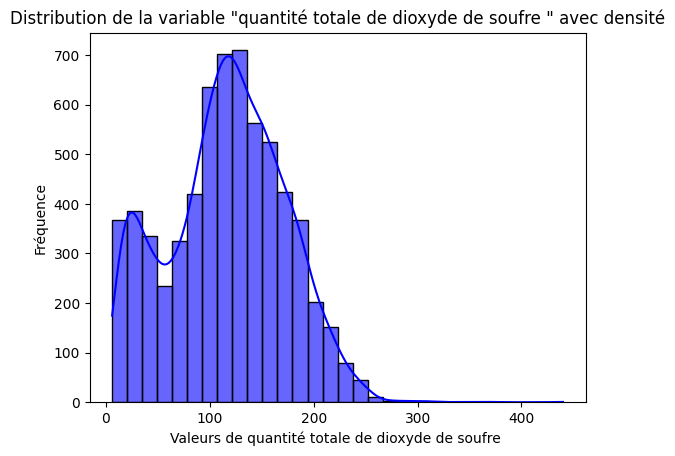

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.histplot(data['total_sulfur_dioxide'], kde=True, bins=30, color='blue', alpha=0.6)
plt.title('Distribution de la variable "quantité totale de dioxyde de soufre " avec densité')
plt.xlabel('Valeurs de quantité totale de dioxyde de soufre ')
plt.ylabel('Fréquence')
plt.show()

# Partie Théorique du Projet

## 1. Loi Forte des Grands Nombres (LFGN)

### Théorie :
La **Loi Forte des Grands Nombres (LFGN)** stipule que la moyenne empirique d’un échantillon tiré de données indépendantes et identiquement distribuées (i.i.d.) converge presque sûrement vers la moyenne vraie de la population, à mesure que la taille de l’échantillon tend vers l'infini. Cela signifie que plus l'échantillon est grand, plus la moyenne empirique devient proche de la moyenne réelle de la population.

Formellement, soit $ X_1, X_2, X_3, \dots $ des variables aléatoires i.i.d. avec une espérance $ \mu $, alors la moyenne empirique $ \bar{X}_n $ de ces variables converge presque sûrement vers $ \mu $ :
$\lim_{n \to \infty} \frac{1}{n} \sum_{i=1}^{n} X_i = \mu \quad \text{presque sûrement}.$
Cela justifie l’utilisation d’échantillons de grande taille pour estimer la moyenne d’une population de manière fiable.

### Application dans notre projet :
Dans ce projet, nous simulerons des échantillons de tailles croissantes et observerons comment la moyenne empirique des données converge vers la moyenne vraie de la population pour diverses propriétés physico-chimiques du vin, comme le pH.

---

## 2. Théorème Central Limite (TCL)

### Théorie :
Le **Théorème Central Limite (TCL)** est un des résultats les plus puissants en statistique. Il affirme que, peu importe la distribution de la population d'origine, la distribution des moyennes empiriques des échantillons suit une loi normale (ou gaussienne) lorsque la taille de l’échantillon est suffisamment grande.

Formellement, si $ X_1, X_2, X_3, \dots $ sont des variables aléatoires i.i.d. avec une moyenne $ \mu $ et une variance $ \sigma^2 $, alors, pour $ n $ suffisamment grand, la distribution des moyennes empiriques $ \bar{X}_n $ tend vers une loi normale :
$
\frac{\sqrt{n}(\bar{X}_n - \mu)}{\sigma} \xrightarrow{d} \mathcal{N}(0, 1),$
où $ \mathcal{N}(0, 1) $ représente une loi normale standard.

### Application dans notre projet :
Nous allons analyser la distribution des moyennes empiriques pour des échantillons de taille fixe et comparer cette distribution à la loi normale théorique. Cela nous permet de vérifier la validité du TCL, même lorsque les données initiales ne suivent pas une distribution normale.

---

## 3. Convergence des Estimateurs

### Théorie :
La **convergence des estimateurs** fait référence à la façon dont un estimateur, comme la moyenne ou la variance, se rapproche de la véritable valeur du paramètre de la population à mesure que la taille de l'échantillon augmente.

- **Consistance** : Un estimateur est dit **consistant** s’il converge vers la vraie valeur du paramètre à mesure que la taille de l'échantillon devient grande.
- **Biais et Variance** : Un bon estimateur doit avoir un faible biais et une faible variance. Le **biais** mesure l'écart entre la moyenne de l'estimateur et la vraie valeur du paramètre, tandis que la **variance** mesure la dispersion des valeurs estimées obtenues par différents échantillons.

Le comportement de l'estimateur peut être analysé à travers le **biais-variance trade-off**.

### Application dans notre projet :
Nous allons observer la convergence de la moyenne empirique et de la variance à mesure que la taille des échantillons augmente, et analyser la consistance des estimateurs pour la quantité totale de dioxyde de soufre  des vins.

---

## 4. Biais et Variance

### Théorie :
Le **compromis biais-variance** est un concept fondamental dans l'estimation des paramètres. Il implique une relation inverse entre le biais et la variance des estimateurs :

- Un estimateur **biaisé** a une moyenne qui n'est pas égale à la vraie valeur du paramètre. Un estimateur **sans biais** a un biais égal à zéro.
- L’**écart-type** ou la **variance** d'un estimateur mesure la dispersion de ses valeurs. Une faible variance implique que les estimations sont relativement stables d’un échantillon à l’autre, tandis qu’une forte variance peut rendre l'estimation moins fiable.

Le compromis entre le biais et la variance est essentiel pour choisir un bon estimateur, en particulier pour des données réelles où l’on veut à la fois des estimations précises (faible biais) et stables (faible variance).

### Application dans notre projet :
Nous allons étudier la décomposition du biais et de la variance pour nos estimateurs de la moyenne et de la variance. Cela nous permettra de comprendre l’équilibre entre précision et stabilité des estimations en fonction de la taille des échantillons.

---

## 5. Intervalles de Confiance

### Théorie :
Un **intervalle de confiance** est un outil statistique utilisé pour exprimer l'incertitude associée à une estimation. Un intervalle de confiance pour un paramètre est une plage de valeurs qui, avec un certain niveau de confiance (par exemple 95 %), contient la vraie valeur du paramètre.

Pour une moyenne empirique $ \bar{X} $, l'intervalle de confiance est généralement donné par :
$
\bar{X} \pm z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}},$
où $ z_{\alpha/2} $ est la valeur critique de la loi normale pour un niveau de confiance $ 1-\alpha $, $ \sigma $ est l'écart-type de la population, et $ n $ est la taille de l'échantillon.

### Application dans notre projet :
Nous allons construire des intervalles de confiance pour la moyenne empirique de diverses propriétés physico-chimiques du vin, en fonction de la taille de l’échantillon, et analyser leur performance.

---




# 2. Loi Forte des Grands Nombres (LFGN)
Étude de la convergence de la moyenne empirique pour une variable choisie.

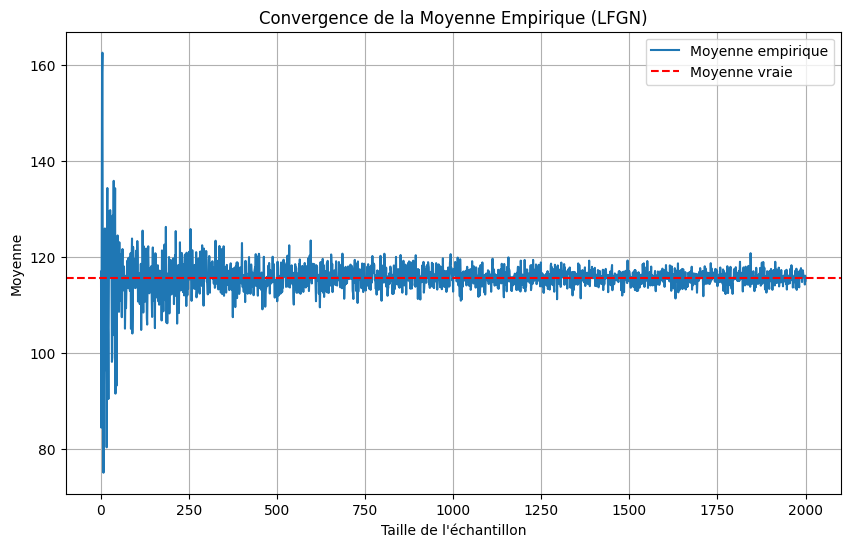

In [ ]:
# Variable d'intérêt
variable = data['total_sulfur_dioxide']

# Simulation des moyennes empiriques pour des tailles croissantes
n_samples = 2000
mean_empirical = [np.mean(variable.sample(n, replace=True)) for n in range(1, n_samples+1)]

# Visualisation de la convergence
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_samples+1), mean_empirical, label="Moyenne empirique")
plt.axhline(y=np.mean(variable), color='red', linestyle='--', label="Moyenne vraie")
plt.xlabel("Taille de l'échantillon")
plt.ylabel("Moyenne")
plt.title("Convergence de la Moyenne Empirique (LFGN)")
plt.legend()
plt.grid()
plt.show()


**Observation :**

 - La courbe des moyennes empiriques commence par fluctuer fortement pour de petits échantillons, car la variance des moyennes est grande.

 - Au fur et à mesure que la taille des échantillons augmente, la moyenne empirique converge vers la moyenne vraie de la population.

- La convergence illustre la LFGN, montrant que la moyenne empirique est une estimation fiable de la moyenne réelle pour de grands échantillons.

# 3. Théorème Central Limite (TCL)
Étude de la distribution des moyennes empiriques pour des échantillons de taille fixe.

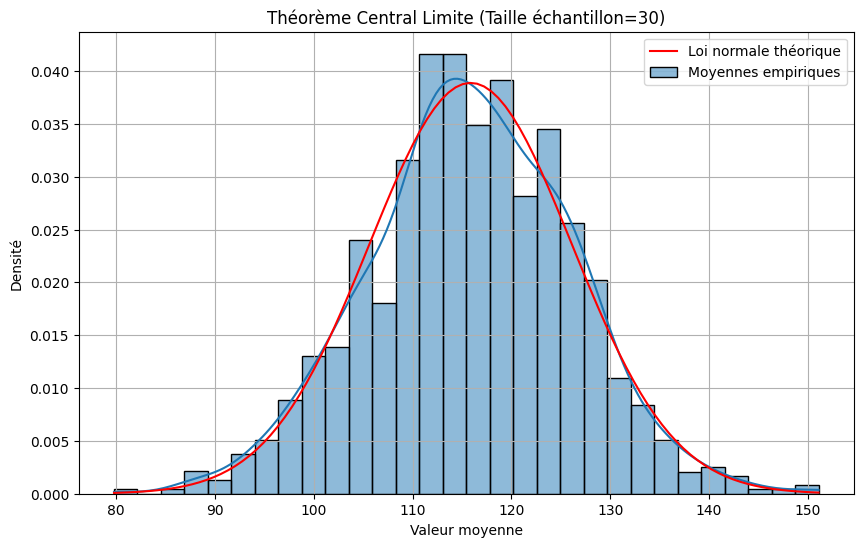

In [ ]:
from scipy.stats import norm
# Taille des échantillons et nombre de simulations
sample_size = 30
n_simulations = 1000

# Moyennes empiriques
means = [np.mean(variable.sample(sample_size, replace=True)) for _ in range(n_simulations)]

# Visualisation de l'histogramme et comparaison avec une loi normale
plt.figure(figsize=(10, 6))
sns.histplot(means, kde=True, stat="density", bins=30, label="Moyennes empiriques")
x = np.linspace(min(means), max(means), 100)
plt.plot(x, norm.pdf(x, loc=np.mean(means), scale=np.std(means)), label="Loi normale théorique", color="red")
plt.xlabel("Valeur moyenne")
plt.ylabel("Densité")
plt.title(f"Théorème Central Limite (Taille échantillon={sample_size})")
plt.legend()
plt.grid()
plt.show()


Observation :

- L’histogramme des moyennes empiriques suit une forme gaussienne, même comme la distribution initiale des données  n’est pas normale.

- La courbe rouge de la loi normale théorique correspond bien à l’histogramme. Cela confirme que la distribution des moyennes empiriques converge vers une loi normale, comme stipulé par le TCL.


#4. Convergence des Estimateurs
Étude des estimateurs de la moyenne et de la variance en fonction de la taille de l'échantillon.

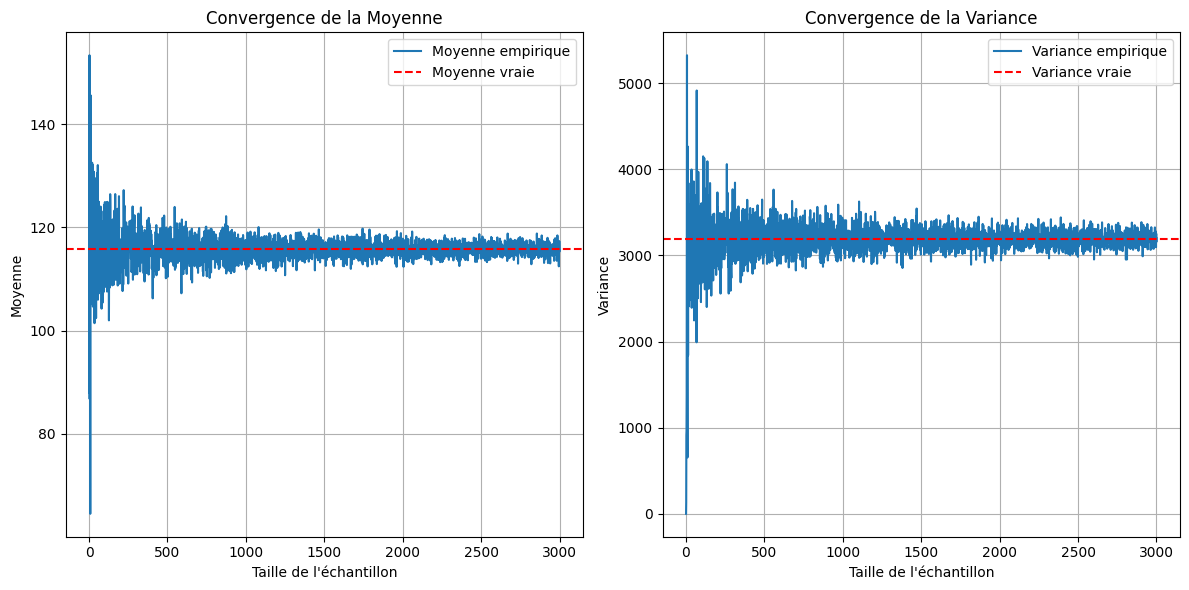

In [ ]:
# Simulation pour tailles croissantes
n_samples = 3000
means = [np.mean(variable.sample(n, replace=True)) for n in range(1, n_samples+1)]
variances = [np.var(variable.sample(n, replace=True)) for n in range(1, n_samples+1)]

# Visualisation de la convergence
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, n_samples+1), means, label="Moyenne empirique")
plt.axhline(y=np.mean(variable), color='red', linestyle='--', label="Moyenne vraie")
plt.xlabel("Taille de l'échantillon")
plt.ylabel("Moyenne")
plt.title("Convergence de la Moyenne")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(1, n_samples+1), variances, label="Variance empirique")
plt.axhline(y=np.var(variable), color='red', linestyle='--', label="Variance vraie")
plt.xlabel("Taille de l'échantillon")
plt.ylabel("Variance")
plt.title("Convergence de la Variance")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


**Observation :**

- La moyenne empirique se stabilise autour de la moyenne vraie au fur et à mesure que la taille de l’échantillon augmente. Cela illustre que l’estimateur de la moyenne est consistant.
La variance empirique devient également plus stable avec des tailles croissantes. Cela montre que l’estimateur de la variance est également consistant.
- Les oscillations initiales pour de petits échantillons sont normales : les estimateurs sont sensibles à la variabilité dans ces conditions.

# 5. Biais et Variance
Analyse biais-variance des estimateurs.

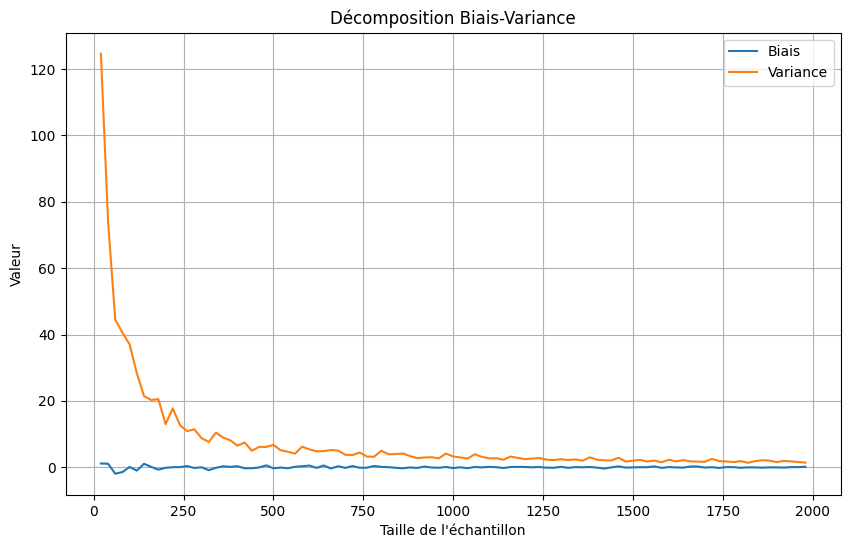

In [ ]:
# Fonction d'estimation
def estimate(sample_size, n_simulations=100):
    estimates = [np.mean(variable.sample(sample_size, replace=True)) for _ in range(n_simulations)]
    bias = np.mean(estimates) - np.mean(variable)
    variance = np.var(estimates)
    return bias, variance

# Analyse pour différentes tailles d'échantillons
sample_sizes = list(range(0, 2000, 20))
results = [estimate(size) for size in sample_sizes]

# Visualisation
biases, variances = zip(*results)
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, biases, label="Biais")
plt.plot(sample_sizes, variances, label="Variance")
plt.xlabel("Taille de l'échantillon")
plt.ylabel("Valeur")
plt.title("Décomposition Biais-Variance")
plt.legend()
plt.grid()
plt.show()


**Observation :**

- Le biais diminue à mesure que la taille de l'échantillon augmente. Cela montre que l'estimation devient de plus en plus proche de la vraie valeur.
La variance des estimateurs diminue également avec des tailles croissantes, car de plus grands échantillons réduisent l'incertitude.



# 6. Intervalles de Confiance
Construction et interprétation des intervalles de confiance pour la moyenne.

In [ ]:
from scipy.stats import t
import pandas as pd

# Fonction pour calculer l'intervalle de confiance
def confidence_interval(sample, confidence=0.95):
    n = len(sample)
    mean = np.mean(sample)
    se = np.std(sample, ddof=1) / np.sqrt(n)
    h = se * t.ppf((1 + confidence) / 2., n-1)
    return mean, mean - h, mean + h

# Intervalle de confiance pour l'ensemble de la variable
mean_full, ci_lower_full, ci_upper_full = confidence_interval(variable)

# Affichage de l'intervalle de confiance réel
print("Intervalle de confiance réel pour la variable :")
print(f"Moyenne : {mean_full:.2f}")
print(f"Borne inférieure : {ci_lower_full:.2f}")
print(f"Borne supérieure : {ci_upper_full:.2f}\n")

# Exemple avec différentes tailles d'échantillons
sample_sizes = [10, 30, 50, 100,500,1000]
results = []

# Calcul des intervalles pour différentes tailles d'échantillons
for size in sample_sizes:
    sample = variable.sample(size, replace=True)
    mean, ci_lower, ci_upper = confidence_interval(sample)
    results.append({
        'Sample Size': size,
        'Sample Mean': mean,
        'CI Lower': ci_lower,
        'CI Upper': ci_upper
    })

# Créer un DataFrame à partir des résultats
df_results = pd.DataFrame(results)

# Affichage du DataFrame
print("Intervalles de confiance pour les échantillons :")
df_results.head(10)


Intervalle de confiance réel pour la variable :
Moyenne : 115.74
Borne inférieure : 114.37
Borne supérieure : 117.12

Intervalles de confiance pour les échantillons :


,Sample Size,Sample Mean,CI Lower,CI Upper
0,10,88.500000,30.043429,146.956571
1,30,108.733333,87.382100,130.084566
2,50,110.770000,96.611312,124.928688
3,100,109.990000,99.049183,120.930817
4,500,123.682000,118.689258,128.674742
5,1000,116.802000,113.267961,120.336039


**Observation :**

- Pour les échantillons de petite taille , l’intervalle de confiance est large, reflétant une incertitude élevée dans l’estimation.

- À mesure que la taille de l’échantillon augmente, l’intervalle de confiance se resserre, indiquant une meilleure précision.

- Les intervalles couvrent la moyenne vraie (valeur réelle), ce qui est attendu avec un seuil de confiance de 95 %

# **Conclusion**

Ce projet a permis d’explorer les fondements théoriques de la statistique à travers des analyses pratiques et des simulations utilisant le jeu de données **Wine Quality**. Nous avons illustré les concepts clés tels que la **Loi Forte des Grands Nombres** (LFGN) et le **Théorème Central Limite** (TCL), tout en approfondissant des notions essentielles comme la **convergence des estimateurs**, le **compromis biais-variance**, et les **intervalles de confiance**.

Les principales conclusions tirées de notre étude sont les suivantes :  

1. **Loi Forte des Grands Nombres** :  
   La convergence de la moyenne empirique vers la moyenne vraie a été clairement observée, confirmant la fiabilité des estimations issues d’échantillons de grande taille.  

2. **Théorème Central Limite** :  
   Les distributions des moyennes empiriques ont montré une forte concordance avec la loi normale théorique, validant l’applicabilité du TCL même dans des contextes où la distribution initiale des données n’est pas normale.  

3. **Convergence des Estimateurs** :  
   Les résultats ont démontré que les estimateurs de la moyenne et de la variance deviennent plus stables et précis lorsque la taille de l’échantillon augmente, soulignant leur consistance.  

4. **Biais et Variance** :  
   L’analyse a mis en évidence une diminution progressive du biais et de la variance des estimateurs, confirmant qu’un équilibre entre précision et stabilité peut être atteint avec des échantillons de taille adéquate.  

5. **Intervalles de Confiance** :  
   Les intervalles de confiance calculés ont reflété l’incertitude des estimations et leur amélioration progressive avec la taille de l’échantillon, offrant des outils robustes pour l’interprétation des données.  

En combinant théorie et application, ce projet a démontré comment des concepts statistiques fondamentaux peuvent éclairer l’analyse de données réelles. Ces résultats soulignent l’importance de la taille de l’échantillon et des outils mathématiques dans la modélisation statistique et la prise de décision basée sur les données.
